ETAPA 1: CONFIGURAÇÃO DO AMBIENTE E CARGA DOS DADOS

In [23]:
# 1. Importando as bibliotecas
# pandas (DataFrames).
import pandas as pd
# matplotlib e seaborn.
import matplotlib.pyplot as plt
import seaborn as sns
# scikit-learn.
# Importando as ferramentas específicas.
import warnings

# Ignorando avisos futuros para manter a saída do notebook limpa.
warnings.filterwarnings('ignore')

In [24]:
# 2. Carregando o conjunto de dados
# O bloco try-except é uma boa prática para garantir que o arquivo exista.
try:
    # pd.read_csv() é a função do pandas para ler arquivos CSV.
    df = pd.read_csv('crop_yield.csv')
    print("Arquivo 'crop_yield.csv' carregado com sucesso!")
except FileNotFoundError:
    # Se o arquivo não for encontrado, esta mensagem será exibida.
    print("Erro: Arquivo 'crop_yield.csv' não encontrado.")
    print("Por favor, certifique-se de que o arquivo está na mesma pasta que o seu notebook.")
    # Interrompe a execução se o arquivo não for encontrado.
    exit()

Arquivo 'crop_yield.csv' carregado com sucesso!


In [25]:
# 3. Limpeza e Preparação Inicial
# Renomeando as colunas para nomes mais curtos, sem espaços ou caracteres especiais.
df.columns = ['Crop', 'Precipitation_mm', 'Specific_Humidity_gkg', 'Relative_Humidity_pct', 'Temperature_C', 'Yield']

# Convertendo todas as colunas (exceto a primeira) para o formato numérico.
# 'errors='coerce'' transforma qualquer valor que não seja um número em 'NaN' (Not a Number).
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# .dropna() remove qualquer linha que contenha pelo menos um valor NaN.
# Isso garante que não tenhamos dados faltando em nossa análise.
df_cleaned = df.dropna()

In [26]:
# Verificação Final
# Exibindo o número de linhas válidas e as 5 primeiras linhas para confirmar.
print(f"Total de registros válidos para análise: {len(df_cleaned)}")
print("\nAmostra dos dados limpos:")
# A função display() é específica do Jupyter e formata a tabela de forma mais agradável.
display(df_cleaned.head())

Total de registros válidos para análise: 156

Amostra dos dados limpos:


,Crop,Precipitation_mm,Specific_Humidity_gkg,Relative_Humidity_pct,Temperature_C,Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


ETAPA 2: ANÁLISE EXPLORATÓRIA DE DADOS (AED). Nesta etapa, vamos visualizar os dados para encontrar padrões e insights.

In [27]:
print("--- Iniciando a Análise Exploratória de Dados (AED) ---")

# Selecionando as colunas numéricas que queremos analisar.
numerical_cols = ['Precipitation_mm', 'Specific_Humidity_gkg', 'Relative_Humidity_pct', 'Temperature_C', 'Yield']

--- Iniciando a Análise Exploratória de Dados (AED) ---



Gerando histogramas para visualizar a distribuição de cada variável...


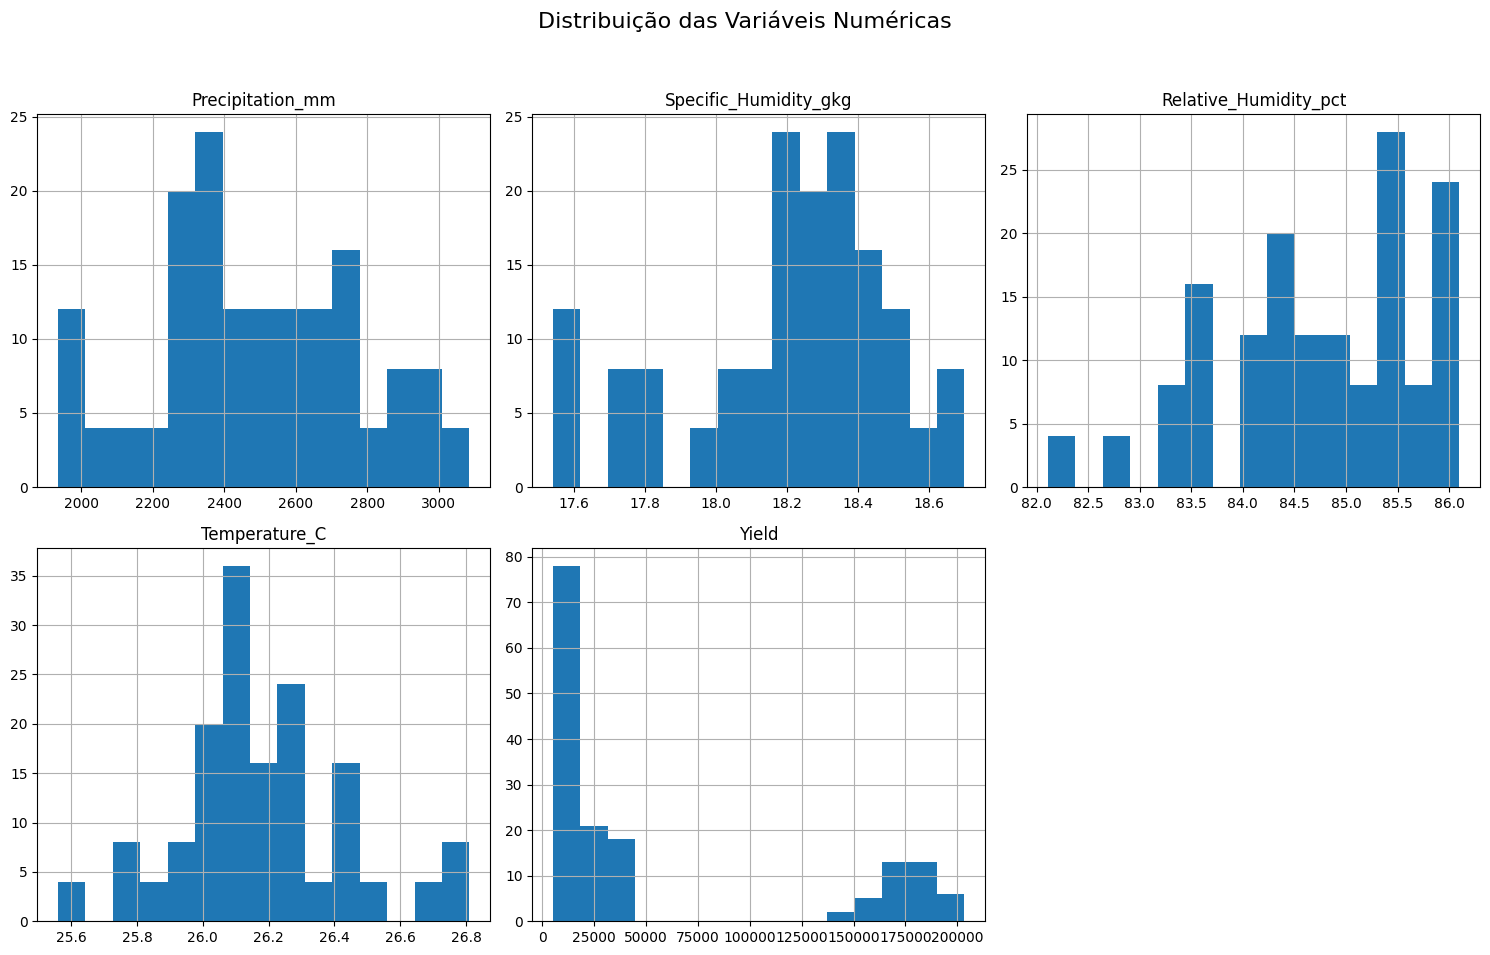

In [28]:
# 1. Histogramas de Distribuição
# .hist() é uma função rápida do pandas para criar um histograma para cada coluna.
# `bins=15` define em quantas "barras" os dados serão divididos.
# `figsize` controla o tamanho da figura que será gerada.
print("\nGerando histogramas para visualizar a distribuição de cada variável...")
df_cleaned[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(2, 3))
# plt.suptitle() adiciona um título geral para todos os sub-gráficos.
plt.suptitle('Distribuição das Variáveis Numéricas', size=16)
# plt.tight_layout() ajusta os gráficos para que não fiquem sobrepostos.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show() exibe o gráfico na tela.
plt.show()


Gerando box plots para identificar valores discrepantes (outliers)...


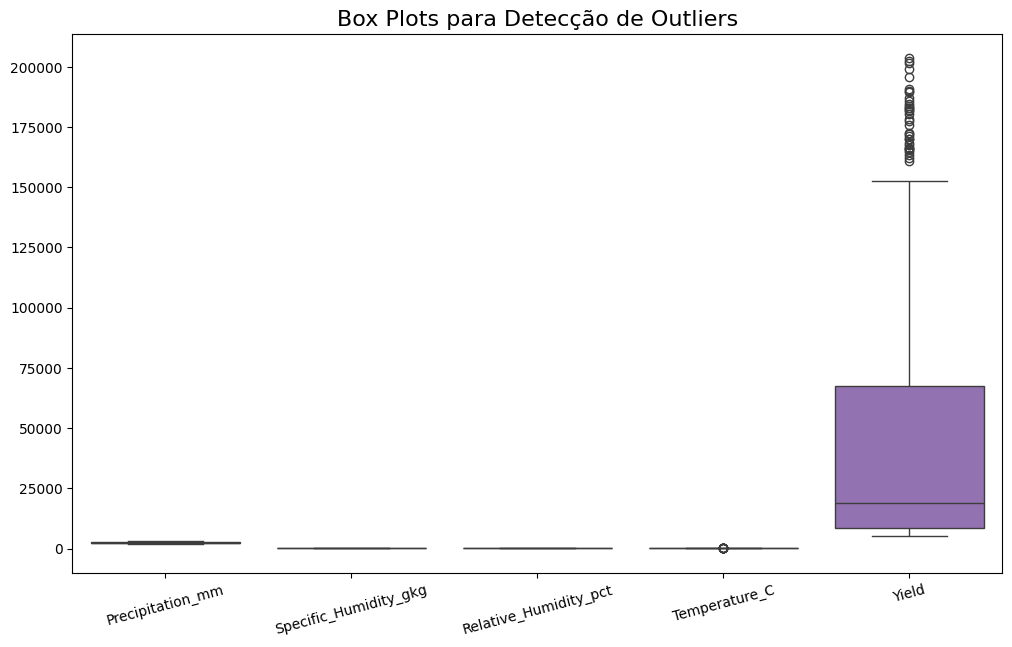

In [29]:
# 2. Box plots para Análise de Outliers
# O box plot resume a distribuição dos dados e destaca os outliers.
print("\nGerando box plots para identificar valores discrepantes (outliers)...")
# Criamos uma figura para o gráfico com um tamanho específico.
plt.figure(figsize=(12, 7))
# sns.boxplot() é a função da biblioteca seaborn para criar o box plot.
sns.boxplot(data=df_cleaned[numerical_cols])
# Adicionando um título ao nosso gráfico.
plt.title('Box Plots para Detecção de Outliers', size=16)
# Rotacionando os nomes no eixo X para não se sobreporem.
plt.xticks(rotation=15)
plt.show()


Gerando mapa de calor para visualizar a correlação entre as variáveis...


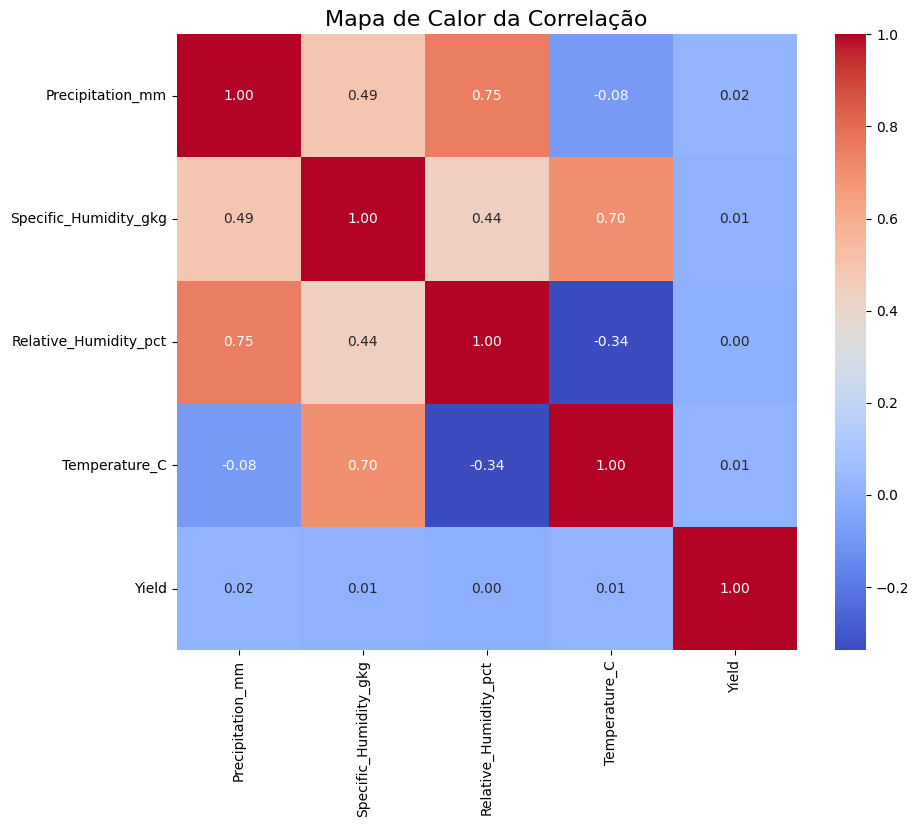

In [30]:
# 3. Mapa de Calor de Correlação
# A matriz de correlação calcula a relação linear entre cada par de variáveis.
print("\nGerando mapa de calor para visualizar a correlação entre as variáveis...")
plt.figure(figsize=(10, 8))
# .corr() calcula a matriz de correlação.
correlation_matrix = df_cleaned[numerical_cols].corr()
# sns.heatmap() desenha a matriz como um mapa de calor colorido.
# `annot=True` escreve os valores de correlação dentro de cada quadrado.
# `cmap='coolwarm'` define a paleta de cores (azul para positivo, vermelho para negativo).
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação', size=16)
plt.show()

ETAPA 3: CLUSTERIZAÇÃO (ANÁLISE DE TENDÊNCIAS). Nesta etapa, usaremos o K-Means para encontrar grupos naturais nos dados.

In [31]:
# Importando as ferramentas de clusterização e padronização do scikit-learn.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("--- Iniciando a Análise de Clusterização ---")

--- Iniciando a Análise de Clusterização ---


In [32]:
# 1. Preparando os Dados para Clusterização

# Selecionando apenas as colunas numéricas que serão usadas para formar os grupos.
numerical_cols = ['Precipitation_mm', 'Specific_Humidity_gkg', 'Relative_Humidity_pct', 'Temperature_C', 'Yield']
X_cluster = df_cleaned[numerical_cols]

# Padronizando os dados: StandardScaler() transforma os dados para que tenham média 0 e desvio padrão 1.
# Isso é fundamental para que o K-Means funcione corretamente, tratando todas as variáveis com igual importância.
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)
print("Dados padronizados com sucesso.")

Dados padronizados com sucesso.


In [33]:
# 2. Encontrando o Número Ideal de Clusters (Método do Cotovelo)

# `inertia` mede o quão compactos os clusters são. Quanto menor, melhor.
inertia = []
# Vamos testar de 1 a 10 clusters para ver qual se encaixa melhor.
K_range = range(1, 11)

print("\nCalculando a inércia para cada número de clusters (de 1 a 10)...")
for k in K_range:
    # Criamos e treinamos um modelo K-Means para cada valor de k.
    # `n_init='auto'` é a configuração padrão para evitar avisos.
    # `random_state=42` garante que os resultados sejam sempre os mesmos.
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_test.fit(X_cluster_scaled)
    # Guardamos o valor da inércia para o modelo atual.
    inertia.append(kmeans_test.inertia_)


Calculando a inércia para cada número de clusters (de 1 a 10)...


Gerando o gráfico do Método do Cotovelo...


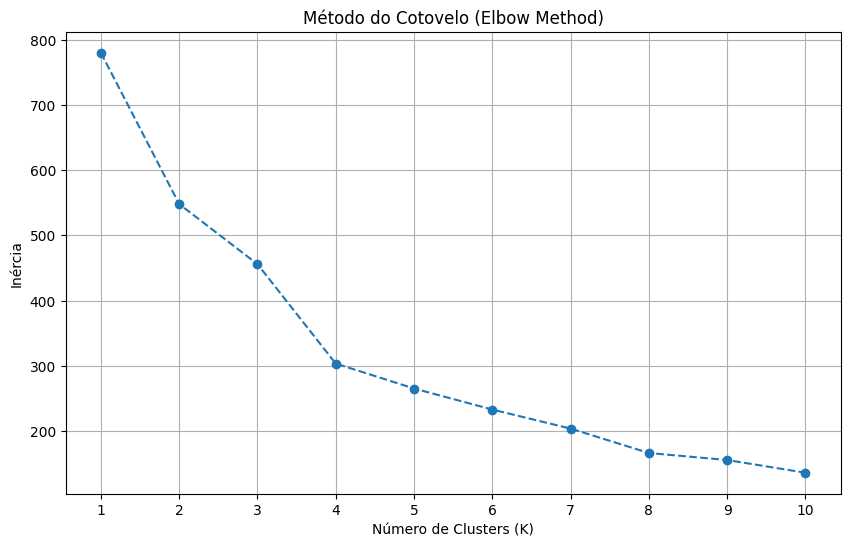

In [34]:
# 3. Plotando o Gráfico do Cotovelo

# Agora, plotamos o número de clusters (K) contra a inércia.
# Procuramos o "cotovelo", o ponto onde a linha começa a achatar.
print("Gerando o gráfico do Método do Cotovelo...")
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo (Elbow Method)')
plt.grid(True)
plt.xticks(K_range)
plt.show()

ETAPA 4: APLICAÇÃO DO K-MEANS E VISUALIZAÇÃO DOS CLUSTERS. Com o número ideal de clusters definido (K=4), vamos aplicar o algoritmo.

In [35]:
# 1. Aplicando o K-Means com K=4
# Definimos o número ideal de clusters encontrado na etapa anterior.
optimal_k = 4
print(f"Aplicando o algoritmo K-Means com K={optimal_k} clusters...")

# Criamos o modelo K-Means final.
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

# Treinamos o modelo e atribuímos cada linha de dados a um cluster.
# O .fit_predict() faz o treinamento e já retorna a qual cluster cada ponto pertence.
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

# Adicionamos a coluna de 'Cluster' ao nosso dataframe original para análise.
# Isso nos permite ver os resultados com os valores reais, não os padronizados.
df_cleaned['Cluster'] = cluster_labels

Aplicando o algoritmo K-Means com K=4 clusters...



Gerando o gráfico de dispersão para visualizar os clusters...


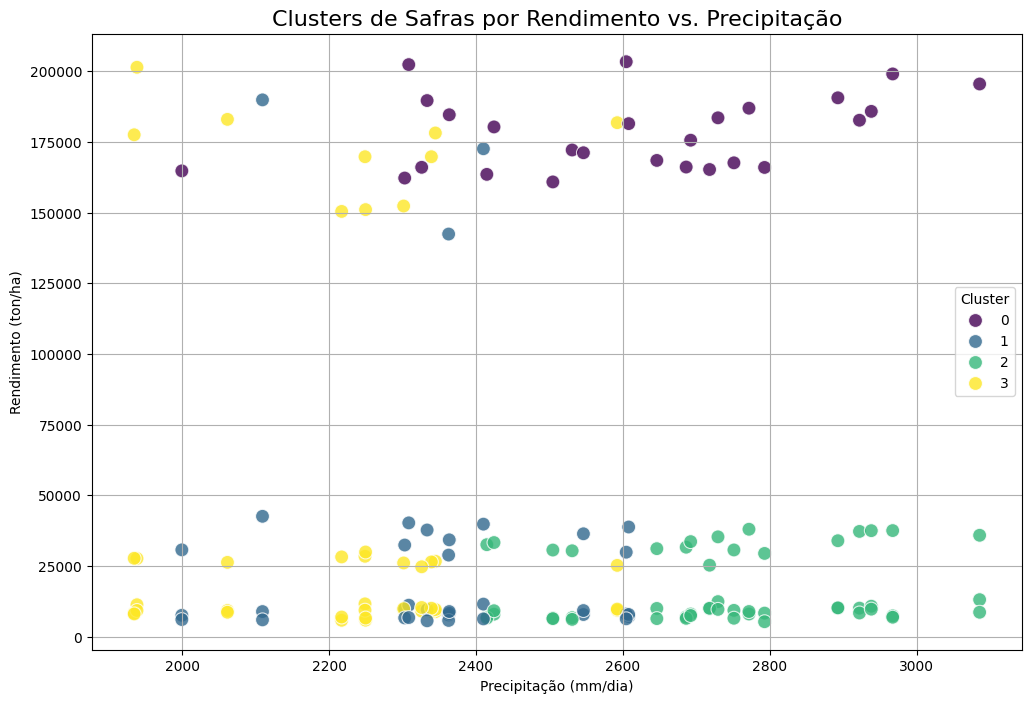

In [36]:
# 2. Visualizando os Clusters Encontrados
print("\nGerando o gráfico de dispersão para visualizar os clusters...")
plt.figure(figsize=(12, 8))

# sns.scatterplot é ideal para visualizar a relação entre duas variáveis e colorir por uma terceira.
# x='Precipitation_mm': Precipitação no eixo X.
# y='Yield': Rendimento no eixo Y.
# hue='Cluster': A cor de cada ponto será definida pelo cluster ao qual ele pertence.
# palette='viridis': Um esquema de cores agradável.
sns.scatterplot(data=df_cleaned, x='Precipitation_mm', y='Yield', hue='Cluster', palette='viridis', s=100, alpha=0.8)

plt.title('Clusters de Safras por Rendimento vs. Precipitação', size=16)
plt.xlabel('Precipitação (mm/dia)')
plt.ylabel('Rendimento (ton/ha)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [37]:
# 3. Analisando as Características de Cada Cluster
# .groupby('Cluster') agrupa todas as linhas pelo número do cluster.
# .mean() calcula a média de todas as colunas numéricas para cada grupo.
# Isso nos ajuda a entender o que cada cluster representa.
cluster_summary = df_cleaned.groupby('Cluster')[numerical_cols].mean()

print("\nCaracterísticas médias de cada cluster:")
display(cluster_summary)


Características médias de cada cluster:


,Precipitation_mm,Specific_Humidity_gkg,Relative_Humidity_pct,Temperature_C,Yield
Cluster,,,,,
0,2610.111154,18.321538,85.204615,26.196154,178310.153846
1,2353.613333,18.409722,84.105556,26.505278,29671.416667
2,2733.517647,18.337647,85.652353,26.118824,16624.000000
3,2230.034186,17.798837,83.899767,25.983488,51344.744186


ETAPA 5: MODELAGEM PREDITIVA (MACHINE LEARNING SUPERVISIONADO). nesta etapa vamos construir modelos para prever o rendimento da safra.

In [38]:
# Importando as ferramentas de modelagem e avaliação do scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("--- Iniciando a Construção dos Modelos Preditivos ---")

--- Iniciando a Construção dos Modelos Preditivos ---


In [39]:
# 1. Preparando os Dados para a Modelagem

# Convertendo a coluna 'Crop' em colunas numéricas (One-Hot Encoding).
# Cada cultura vira uma nova coluna com valores 0 ou 1.
# `drop_first=True` remove a primeira categoria para evitar redundância.
# Também removemos a coluna 'Cluster' que foi usada apenas para a análise anterior.
df_model = pd.get_dummies(df_cleaned.drop('Cluster', axis=1), columns=['Crop'], drop_first=True)

# Separando as variáveis de entrada (X) e a variável alvo (y).
# X: todas as colunas, exceto 'Yield'.
X = df_model.drop('Yield', axis=1)
# y: apenas a coluna 'Yield'.
y = df_model['Yield']

# Dividindo os dados em conjuntos de treino (80%) e teste (20%).
# `random_state=42` garante que a divisão seja sempre a mesma, para que os resultados sejam reprodutíveis.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDados divididos em {X_train.shape[0]} amostras de treino e {X_test.shape[0]} de teste.\n")


Dados divididos em 124 amostras de treino e 32 de teste.



In [40]:
# 2. Definindo, Treinando e Avaliando os 5 Modelos

# Criamos um dicionário com os 5 modelos que vamos testar.
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Criamos um dicionário vazio para guardar os resultados.
results = {}

# Este loop vai passar por cada modelo do dicionário, um por um.
for name, model in models.items():
    print(f"Treinando modelo: {name}...")
    # Treina o modelo com os dados de treino.
    model.fit(X_train, y_train)
    # Faz as previsões no conjunto de teste (dados que o modelo nunca viu).
    y_pred = model.predict(X_test)
    # Calcula as métricas de avaliação (MAE, MSE, R²) e as armazena.
    results[name] = [
        mean_absolute_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred)
    ]

Treinando modelo: Linear Regression...
Treinando modelo: Ridge Regression...
Treinando modelo: Lasso Regression...
Treinando modelo: Random Forest Regressor...
Treinando modelo: Gradient Boosting Regressor...


In [41]:
# 3. Exibindo a Tabela de Resultados

# Convertendo o dicionário de resultados em uma tabela (DataFrame) para fácil visualização.
results_df = pd.DataFrame(results, index=['MAE', 'MSE', 'R²']).T
# Ordenando a tabela pelo R² (do maior para o menor) para ver qual modelo foi o melhor.
results_df = results_df.sort_values(by='R²', ascending=False)

print("\n--- Tabela de Comparação dos Modelos Preditivos ---")
display(results_df)

print("\n--- Fim da Análise Técnica ---")


--- Tabela de Comparação dos Modelos Preditivos ---


,MAE,MSE,R²
Linear Regression,3132.796384,1.930869e+07,0.995022
Lasso Regression,3338.354502,2.033500e+07,0.994758
Random Forest Regressor,2802.370938,2.383356e+07,0.993856
Ridge Regression,4452.248613,3.480047e+07,0.991028
Gradient Boosting Regressor,3108.842605,3.671020e+07,0.990536



--- Fim da Análise Técnica ---
